# 11. 딥러닝 레이어의 이해(2) Embedding, Recurrent

------------------------
### 학습 내용
2. 분포 가설과 분산 표현
  + 분포 가설과 단어의 분산 표현에 대해 알아봅니다.
3. 단어를 부탁해! Embedding 레이어
  + 실습과 함께 Embedding 레이어에 대해 살펴봅니다.
4. 순차적인 데이터! Recurrent 레이어
  + RNN
  + LSTM

### 학습 목표
* 레이어의 개념을 이해합니다.
* 딥러닝 모델 속 각 레이어(Embedding, RNN, LSTM)의 동작 방식을 이해합니다.
* 데이터의 특성을 고려한 레이어를 설계하고, 이를 TensorFlow로 정의하는 법을 배웁니다.

---------------------------------

## 11-2. 분포 가설과 분산 표현

* **희소 표현(Sparse Representation)**은 특정 차원의 단어나 의미를 직접! 매핑하는 것. 각 단어 마다의 의미나 고유 특성을 하나씩 매핑하는 것은 매우 많은 특성을 생성하며 금방 한계를 보게 된다.

### 단어의 분산 표현(Distributed Representation)

단어의 분산 표현은 **분산 가설**을 기반으로 문장의 맥락을 보고 고정 차원의 벡터로 표현하는 것이다. 하나의 차원(특성)이 무엇을 의미하는지는 알수 없으나 차원이 모인 벡터는 문장의 맥락이 매끄러운가를 알수 있고 단어간 유사도를 구할 수 있다.

---------------
**Q_11.2. Embedding 레이어는 신경망 훈련 도중에 업데이트되는 것이 일반적이지만, Embedding 레이어만을 훈련하기 위한 방법들도 있습니다. 직접 알아보고 대표적인 방법을 한 가지 이상 적어봅시다.**   
Word2Vec, GloVe(같이 나오는 단어를 짝지어 계산), FastText(단어를 또 나누어 GloVe와 같이 계산), ELMo(문장으로 판단. 문맥에 따를 의미 또한 판단 가능)

---------------

## 11-3. 단어를 부탁해! Embedding 레이어

**Embedding Layer**는 입력으로 들어온 단어를 분산 표현으로 바꾸어 주는 역할. Weight에서 특정 행을 읽어오는 것과 같아 **룩업 테이블(Lookup Table)**이라고 부르기도 한다.

또한 Enbedding Layer는 입력에 직접 연결해야 하고, 미분이 불가능히

[Brain's Pick:단어 간 유사도 파악 방법](https://brunch.co.kr/@kakao-it/189) 

In [1]:
import tensorflow as tf

vocab = {      # 사용할 단어 사전 정의
    "i": 0,
    "need": 1,
    "some": 2,
    "more": 3,
    "coffee": 4,
    "cake": 5,
    "cat": 6,
    "dog": 7
}

sentence = "i i i i need some more coffee coffee coffee"
# 위 sentence
_input = [vocab[w] for w in sentence.split()]  # [0, 0, 0, 0, 1, 2, 3, 4, 4, 4]

vocab_size = len(vocab)   # 8

one_hot = tf.one_hot(_input, vocab_size)
print(one_hot.numpy())    # 원-핫 인코딩 벡터를 출력해 봅시다.

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]


In [2]:
distribution_size = 2   # 보기 좋게 2차원으로 분산 표현하도록 하죠!
linear = tf.keras.layers.Dense(units=distribution_size, use_bias=False)
one_hot_linear = linear(one_hot)

print("Linear Weight")
print(linear.weights[0].numpy())

print("\nOne-Hot Linear Result")
print(one_hot_linear.numpy())

Linear Weight
[[-0.22547811 -0.19256586]
 [ 0.06138408 -0.5794339 ]
 [ 0.63886034 -0.59490514]
 [ 0.63096726  0.651829  ]
 [ 0.16512322 -0.01195163]
 [-0.42993242  0.01142293]
 [ 0.5460812   0.29852664]
 [-0.74838066 -0.17074609]]

One-Hot Linear Result
[[-0.22547811 -0.19256586]
 [-0.22547811 -0.19256586]
 [-0.22547811 -0.19256586]
 [-0.22547811 -0.19256586]
 [ 0.06138408 -0.5794339 ]
 [ 0.63886034 -0.59490514]
 [ 0.63096726  0.651829  ]
 [ 0.16512322 -0.01195163]
 [ 0.16512322 -0.01195163]
 [ 0.16512322 -0.01195163]]


In [3]:
some_words = tf.constant([[3, 57, 35]])
# 3번 단어 / 57번 단어 / 35번 단어로 이루어진 한 문장입니다.

print("Embedding을 진행할 문장:", some_words.shape)
embedding_layer = tf.keras.layers.Embedding(input_dim=64, output_dim=100)
# 총 64개의 단어를 포함한 Embedding 레이어를 선언할 것이고,
# 각 단어는 100차원으로 분산 표현 할 것입니다.

print("Embedding된 문장:", embedding_layer(some_words).shape)
print("Embedding Layer의 Weight 형태:", embedding_layer.weights[0].shape)

Embedding을 진행할 문장: (1, 3)
Embedding된 문장: (1, 3, 100)
Embedding Layer의 Weight 형태: (64, 100)


## 11-4. 순차적인 데이터! Recurrent 레이어 (1) RNN

순차적인 특성을 가지는 데이터 즉, 요소 간의 연관성이 있는 데이터를 처리하기 위한 모델!!

**Recurrent Neural Network 또는 Recurrent 레이어(이하 RNN)**는 아래의 그림과 같은 구조를 가졌다.


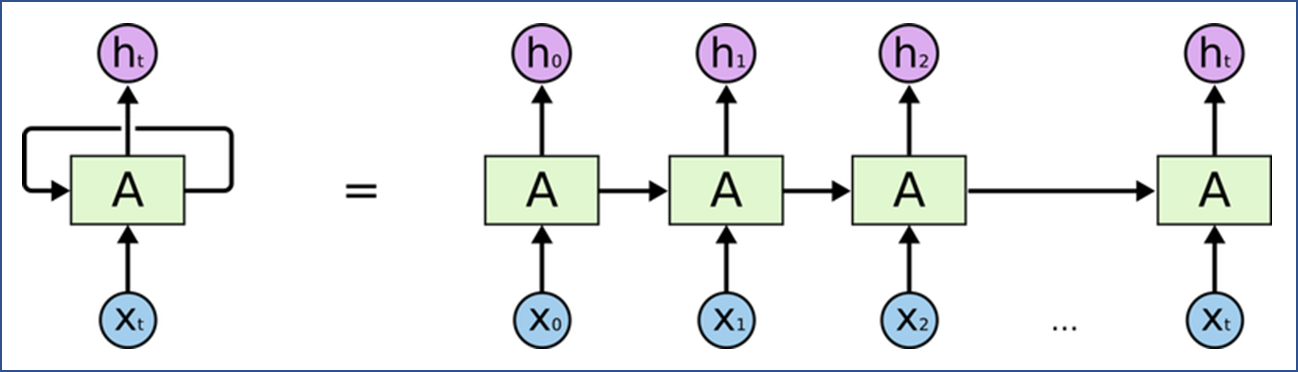

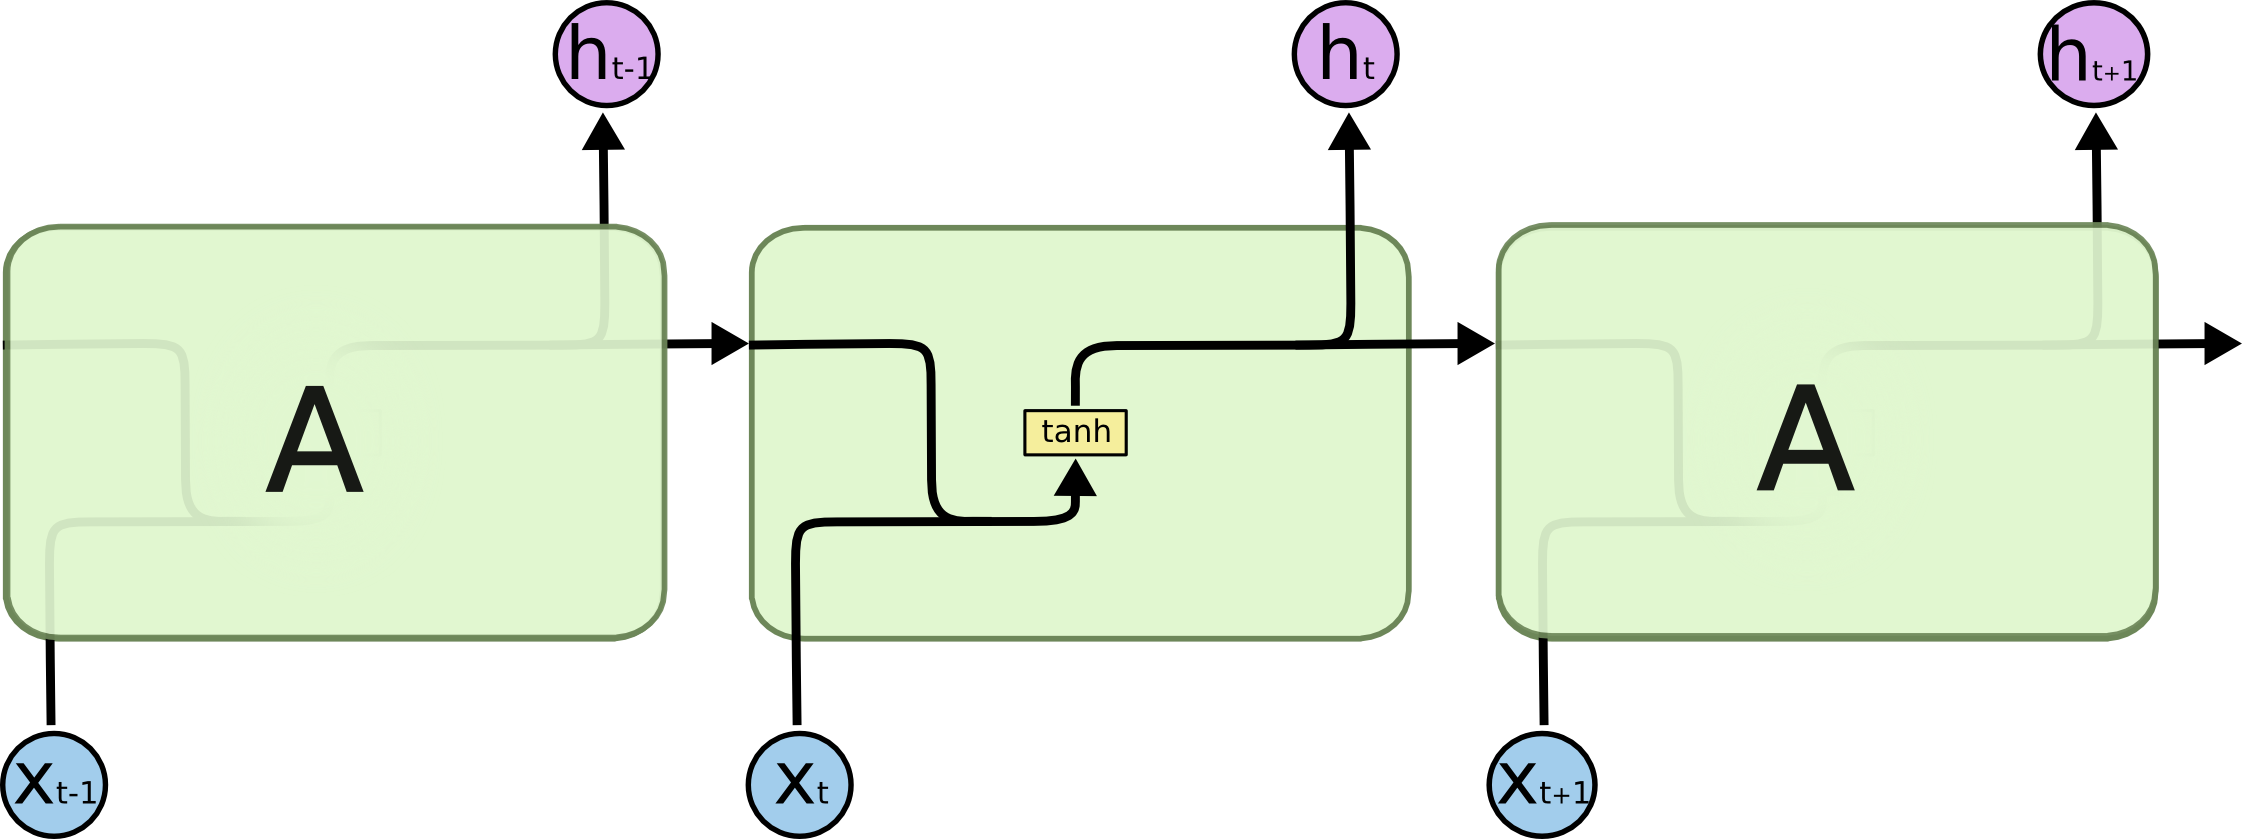

RNN은 단 하나의 Weight를 순차적으로 업데이트하는 것이다.

여기서 RNN의 단점은 입력의 앞부분이 점차 뒤로 갈수록 영향이 작아지는 기울기 소실(vanishing Gradient)문제가 있다.

In [11]:
sentence = "What time is it ?"
dic = {
    "is": 0,
    "it": 1,
    "What": 2,
    "time": 3,
    "?": 4
}

print("RNN에 입력할 문장:", sentence)

sentence_tensor = tf.constant([[dic[word] for word in sentence.split()]])

print("Embedding을 위해 단어 매핑:", sentence_tensor.numpy())
print("입력 문장 데이터 형태:", sentence_tensor.shape)

embedding_layer = tf.keras.layers.Embedding(input_dim=len(dic), output_dim=100)
emb_out = embedding_layer(sentence_tensor)

print("\nEmbedding 결과:", emb_out.shape)
print("Embedding Layer의 Weight 형태:", embedding_layer.weights[0].shape)

rnn_seq_layer = \
tf.keras.layers.SimpleRNN(units=64, return_sequences=True, use_bias=False)
rnn_seq_out = rnn_seq_layer(emb_out)

print("\nRNN 결과 (모든 Step Output):", rnn_seq_out.shape)
print("RNN Layer의 Weight 형태:", rnn_seq_layer.weights[0].shape)

rnn_fin_layer = tf.keras.layers.SimpleRNN(units=64, use_bias=False)
rnn_fin_out = rnn_fin_layer(emb_out)

print("\nRNN 결과 (최종 Step Output):", rnn_fin_out.shape)
print("RNN Layer의 Weight 형태:", rnn_fin_layer.weights[0].shape)

RNN에 입력할 문장: What time is it ?
Embedding을 위해 단어 매핑: [[2 3 0 1 4]]
입력 문장 데이터 형태: (1, 5)

Embedding 결과: (1, 5, 100)
Embedding Layer의 Weight 형태: (5, 100)

RNN 결과 (모든 Step Output): (1, 5, 64)
RNN Layer의 Weight 형태: (100, 64)

RNN 결과 (최종 Step Output): (1, 64)
RNN Layer의 Weight 형태: (100, 64)


In [12]:
lstm_seq_layer = tf.keras.layers.LSTM(units=64, return_sequences=True, use_bias=False)
lstm_seq_out = lstm_seq_layer(emb_out)

print("\nLSTM 결과 (모든 Step Output):", lstm_seq_out.shape)
print("LSTM Layer의 Weight 형태:", lstm_seq_layer.weights[0].shape)

lstm_fin_layer = tf.keras.layers.LSTM(units=64, use_bias=False)
lstm_fin_out = lstm_fin_layer(emb_out)

print("\nLSTM 결과 (최종 Step Output):", lstm_fin_out.shape)
print("LSTM Layer의 Weight 형태:", lstm_fin_layer.weights[0].shape)


LSTM 결과 (모든 Step Output): (1, 5, 64)
LSTM Layer의 Weight 형태: (100, 256)

LSTM 결과 (최종 Step Output): (1, 64)
LSTM Layer의 Weight 형태: (100, 256)


## 11-5. 순차적인 데이터! Recurrent 레이어 (2) LSTM

**장기 의존성(Long-Term Dependency)**은 RNN의 구조가 가지는 한계이고 이와 같은 기울기 소실 문제를 해결하기 위한 모델이 **LSTM(Long Short-Term Memory)**이다.




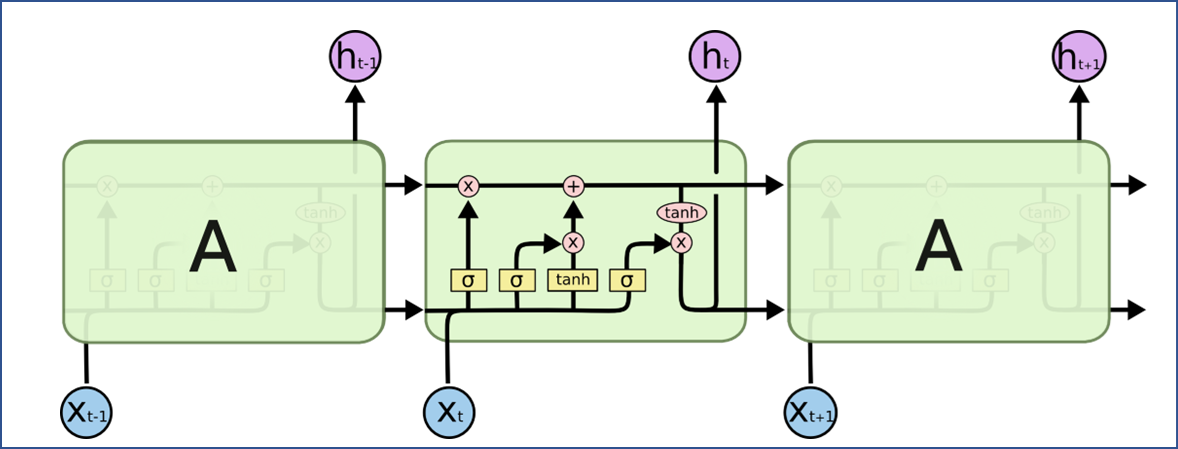

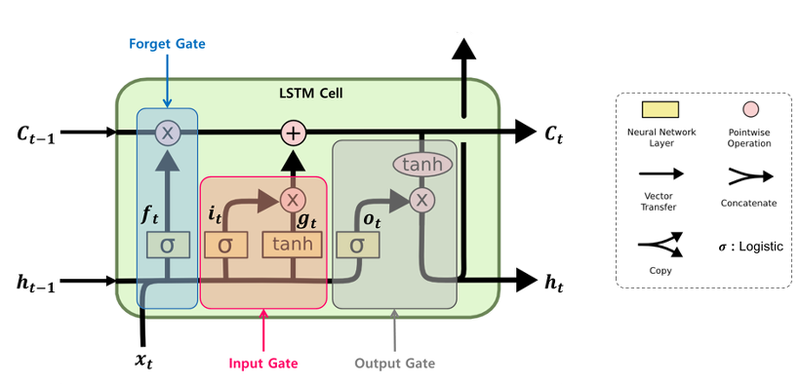

LSTM은 장기기억과 단기기억을 처리하는 부분을 나누어 문제를 해결했다.

위 그래프에서 위의 가로 줄 $C_{t-1}$에서 부터 $C_t$로 가는 선인 Cell state에 gate를 이용하여 뭔가를 더하거나 없애는 것으로 이루어진 모델이다.

* Forget Gate : cell state로부터 어떤 정보를 버릴것인지 정하는 게이트이다. 
$$
f_t = \sigma(W_f\cdot [h_{t-1,x_t}]+b_f)
$$
* Input Gate : 새로운 정보 중 어떤 정보를 저장할 것인지 정하는 게이트이다.
$$
i_t = \sigma(W_i\cdot[h_{t-1,x_t}]+b_i)$$
$$
\tilde{C_t} = \text{tanh}(W_C\cdot[h_{t-1,x_t}]+b_C)$$

**Cell state($C_{t}$) 업데이트**  
 이전 state $C_{t-1}$에 $f_t$를 곱해 잊고 싶은 정보를 0과 같은 값으로 곱해지니 잊혀진다. 그리고 업데이트 하고싶은 값을 더하여 state를 업데이트 한다.
$$
C_t = f_t*C_{t-1}+i_t*\tilde{C_t}$$

* Output Gate : 무엇을 output으로 내보낼 지를 정한다.
$$
o_t=\sigma(W_o[h_{t-1,x_t}]+b_o)$$
$$
h_t=o_t\text{tanh}(C_t)$$


LSTM의 변형 **GRU(Gated Recurrent Unit)**는 Cell state와 hidden state를 합치고, forget gate와 input gate를 합친 모델이다.  
LSTM보다 학습할 가중치가 더 적다는 장점을 가지고 비슷한 성능을 낸다. 각각의 장점을 가지고 상황에 따라 두 모델을 선택해 쓸 수 있다.


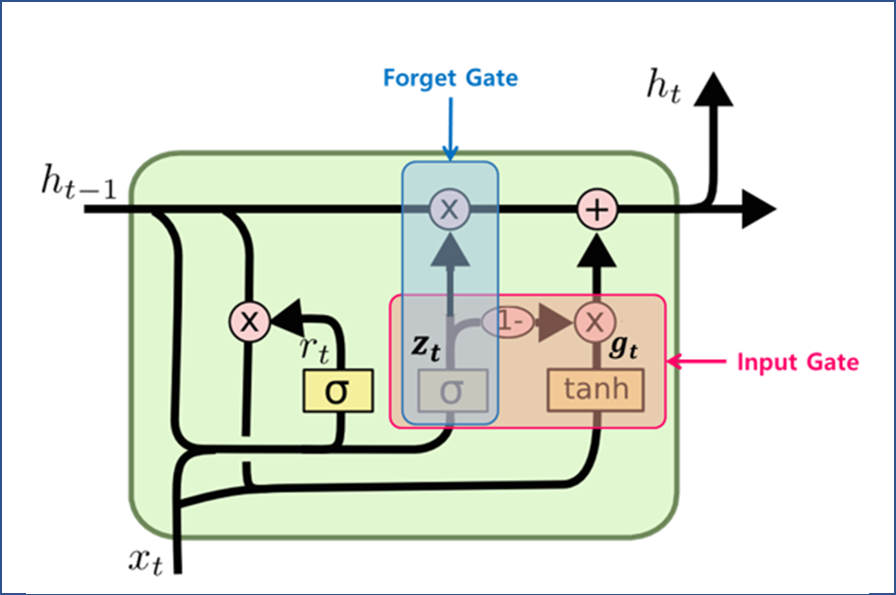

### 양방향(Bidirectional) RNN

진행 방향에 변화를 준 RNN이다. 단순히 순방향과 역방향의 학습을 진행한다. 따라서 Weight또한 두배가 된다.

In [13]:
import tensorflow as tf

sentence = "What time is it ?"
dic = {
    "is": 0,
    "it": 1,
    "What": 2,
    "time": 3,
    "?": 4
}

sentence_tensor = tf.constant([[dic[word] for word in sentence.split()]])

embedding_layer = tf.keras.layers.Embedding(input_dim=len(dic), output_dim=100)
emb_out = embedding_layer(sentence_tensor)

print("입력 문장 데이터 형태:", emb_out.shape)

bi_rnn = \
tf.keras.layers.Bidirectional(
    tf.keras.layers.SimpleRNN(units=64, use_bias=False, return_sequences=True)
)
bi_out = bi_rnn(emb_out)

print("Bidirectional RNN 결과 (최종 Step Output):", bi_out.shape)

입력 문장 데이터 형태: (1, 5, 100)
Bidirectional RNN 결과 (최종 Step Output): (1, 5, 128)
